## Module 02: Gathering Data


### Lesson 01: Gathering Data

> Gather data from various sources and a variety of file formats using Python. Rotten Tomatoes ratings, Roger Ebert reviews, and Wikipedia movie poster images make up the dataset for this lesson.

#### 01. Introduction

You're going to master gathering data. Depending on your project, gathering data varies a lot. Data you need may be spread across dozens of sources and in different file formats, which might be the most challenging part of working with data.

#### 02. Lesson Outline

Gathering data is the first step in data wrangling. Before gathering, we have no data, and after it, we do.

When you do find your data, it's not unusual for it to be spread across several different sources and file formats, which makes things tricky when organizing the data in your programming environment.

This lesson will be structured as follows:

1. First, we'll pose a few questions.
2. Then you'll explore the source of each piece of data we need to answer those questions, each piece from a different source and in a different format.
3. Then you'll learn about the structure of each file format.
4. Then you'll learn how to handle that file format using Python and its libraries.
5. Then you'll actually gather each piece of data to later join together to create your master dataset.

#### 03. Dataset: Finding the Best Movies

For lots of people, Roger Ebert's was the only review they needed because he explained the movie in such a way that they would know whether they would like it or not, his opinion notwithstanding.

wouldn't it be cool to compare this critic's score and also the audience score for all of these movies to see which movie really truly is the best? Also to find the worst best movie if you will.

I'm picturing a scatterplot with four quadrants, like this one, but with different axis labels and values. We'd have audience score on the horizontal axis and critics score on the vertical one.

Wouldn't it be neat if we had a word cloud for each of the movies in that top 100 list with Roger Ebert's review text in that word cloud for each movie? so we could take the movie poster for each movie and surround it with a stencil and then put the word cloud around the poster image.

#### 04. Navigating Your Working Directory and File I/O

1. Command Line

Before you continue on with this lesson, make sure you are comfortable working with your computer's command line interface to access files and folders, and also with reading and writing to files (i.e. part of File I/O or input/output) in Python.

For the command line interface, here are three excellent resources that I recommend. Pick whichever suits you best:

* Our short (Linux Command Line Basics)https://www.udacity.com/course/linux-command-line-basics--ud595) course (for Linux and Mac users)
* [Navigating the Terminal: A Gentle Introduction](Navigating the Terminal: A Gentle Introduction) by Marius Masalar (for Mac users)
* [Command Prompt - How to use the simple, basic commands](http://www.digitalcitizen.life/command-prompt-how-use-basic-commands) by Codrut Neagu (for Windows users)


2. File I/O

For reading from and writing to files in Python:

The "Reading from a File" concept in Lesson 5 ("Files and Modules") of our [Introduction to Python](https://www.udacity.com/course/introduction-to-python--ud1110) course

#### 05. Source: Files on Hand

Internal data from a database can be downloaded programmatically from the file storage systems (like Google Drive) for some companies, though it is often trickier than downloading a file hosted on a web page. 

In practice, internal files aren't often downloaded programmatically for wrangling and analysis/visualization/modeling.

#### 06. Flat File Structure

Flat files contain tabular data in plain text format with one data record per line and each record or line having one or more fields. These fields are separated by delimiters, like commas, tabs, or colons.

**Advantages of flat files include**:

* They're text files and therefore human readable.
Lightweight.
* Simple to understand.
* Software that can read/write text files is ubiquitous, like text editors.
* Great for small datasets.

**Disadvantages of flat files**, in comparison to relational databases, for example, include:

* Lack of standards.
* Data redundancy.
* Sharing data can be cumbersome.
* Not great for large datasets (see "When does small become large?" in the Cornell link in More Information).

#### 07. Flat Files in Python

In the Jupyter Notebook below, import the Rotten Tomatoes Top 100 Movies of All Time TSV file ('bestofrt.tsv') into a pandas DataFrame. Hint: read up on the *sep* parameter in the read_csv documentation.

In [1]:
import pandas as pd
df1 = pd.read_csv('bestofrt.tsv', sep='\t')
df1.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
ranking                     100 non-null int64
critic_score                100 non-null int64
title                       100 non-null object
number_of_critic_ratings    100 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


#### 08. Source: Web Scraping

Web scraping is a fancy way of saying extracting data from web sites using code.

The data that lives on web pages is called HTML, HyperText Markup Language. It's made up of these things called tags which give the web page structure. Because HTML code is just text, these tags and the content within them can be accessed using parsers, and in Python, there is an awesome one called Beautiful Soup. We can download HTML and access it offline, or we can do it in real time over the Internet.

The two main ways to work with HTML files are:

* Saving the HTML file to your computer (using the Requests library for example) library and reading that file into a BeautifulSoup constructor
* Reading the HTML response content directly into a BeautifulSoup constructor (again using the Requests library for example)

I've downloaded all of the Rotten Tomatoes HTML files for you and put them in a folder called rt_html in the Jupyter Notebooks in the Udacity classroom. 

The rt_html folder contains the Rotten Tomatoes HTML for each of the Top 100 Movies of All Time as the list stood at the most recent update of this lesson. I'm giving you these historical files because the ratings will change over time and there will be inconsistencies with the recorded lesson videos. Also, a web page's HTML is known to change over time. Scraping code can break easily when web redesigns occur, which makes scraping brittle and not recommended for projects with longevity. 

#### 09. HTML File Structure

The Hypertext Markup Language (or HTML) is the language used to create documents for the World Wide Web.

If you'd like to learn more, or are feeling like there are knowledge gaps you'd like to fill in, I encourage you to check out Cameron's "Intro to HTML and CSS" course. You can find it [here](https://www.udacity.com/course/intro-to-html-and-css--ud304).

#### 10. HTML Files in Python

With your knowledge of HTML file structure, you're going to use Beautiful Soup to extract our desired Audience Score metric and number of audience ratings, along with the movie title like in the video above.

The Jupyter Notebook below contains template code that:

* Creates an empty list, df_list, to which dictionaries will be appended. This list of dictionaries will eventually be converted to a pandas DataFrame (this is the [most efficient way of building a DataFrame row by row](https://stackoverflow.com/a/28058264)).
* Loops through each movie's Rotten Tomatoes HTML file in the rt_html folder.
* Opens each HTML file and passes it into a file handle called file.
* Creates a DataFrame called df by converting df_list using the [pd.DataFrame constructor](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [3]:
from bs4 import BeautifulSoup

with open('rt_html/et_the_extraterrestrial.html') as file:
    soup = BeautifulSoup(file, 'lxml')

In [4]:
soup.find('title').contents[0][:-len(" - Rotten Tomatoes")].replace(u'\xa0', u'')

'E.T. The Extra-Terrestrial(1982)'

In [5]:
soup.find('div', class_ = "audience-score meter").find('span').contents[0][:-1]

'72'

In [6]:
soup.find(class_ = "audience-info hidden-xs superPageFontColor").find_all("div")[1].contents[-1].strip().replace(',', '')

'32313030'

In [13]:
# Extract the title, audience score, 
# And number of audience ratings in each HTML file 
import os
df_lists = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    if movie_html[0] == '.':
        continue
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file, 'lxml')
        title = soup.find('title').contents[0][:-len(" - Rotten Tomatoes")].replace(u'\xa0', u'')
        audience_score = soup.find(class_ = "audience-score meter").find(class_ = "superPageFontColor").contents[0][:-1]
        number_of_audience_ratings = soup.find(class_ = "audience-info hidden-xs superPageFontColor").find_all("div")[1].contents[-1].strip().replace(',', '')
        df_lists.append({'title': title,
                         'audience_score': audience_score,
                         'number_of_audience_ratings': number_of_audience_ratings})

In [14]:
df2 = pd.DataFrame(df_lists, columns = ['title', 'audience_score', 'number_of_audience_ratings'])
df2.head()

,title,audience_score,number_of_audience_ratings
0,Zootopia(2016),92,98633
1,The Treasure of the Sierra Madre(1948),93,25627
2,All Quiet on the Western Front(1930),89,17768
3,Rear Window(1954),95,149458
4,Selma(2015),86,60533


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
title                         100 non-null object
audience_score                100 non-null object
number_of_audience_ratings    100 non-null object
dtypes: object(3)
memory usage: 2.4+ KB


#### 11. Flashforward 1

In [16]:
df1 = df1.sort_values(by='title').reset_index(drop=True)
df2 = df2.sort_values(by='title').reset_index(drop=True)
df = df1.combine_first(df2)

**Scatter Plot**

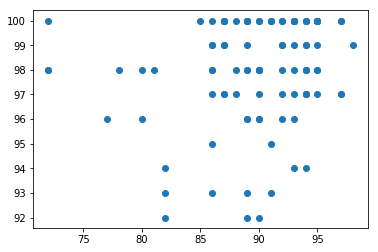

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.audience_score, df.critic_score);

**Tableau**

You've got audience score on the horizontal axis ranging from 70% to 100%, critics score in the vertical axis ranging from 91% to 100%, well technically, 101, but that's just for visual purposes. Then you've got these reference lines. The vertical one being the median of audience score, which is 90%, and the horizontal reference line is the median of critics score, 98%.

* In the top right corner of the screen, we've even got number of audience ratings and number of critic ratings represented visually, too.
* Lighter shades of blue mean small number of audience ratings and darker shades of blue means a larger number. And smaller circles mean a smaller number of critic ratings and larger circles mean a larger number of critic ratings.
* In the top right corner of the screen, we've got universally loved movies. High audience scores, high critics scores.
* In the bottom right corner, we've got critically underrated movies. Audience scores above the median audience score for this top 100 list and critics scores below the median critics score for this top 100 list.
* In the top left, we have critically overrated movies. Audiences didn't like these movies as much as critics did, basically.
* In the bottom left quadrant, we've got movies that didn't have particularly high critic or audience scores in reference to the movies on this list.

#### 12. Source: Downloading Files from the Internet

**HTTP (Hypertext Transfer Protocol)**

HTTP, the Hypertext Transfer Protocol, is the language that web browsers (like Chrome or Safari) and web servers (basically computers where the contents of a website are stored) speak to each other. Every time you open a web page, or download a file, or watch a video, it's HTTP that makes it possible.

In [18]:
import requests
import os

In [19]:
#folder_name = 'ebert_reviews'
#if not os.path.exists(folder_name):
#    os.makedirs(folder_name)

#url = "text-urls"
#response = requests.get(url)
#with open(oa.path.join(folder_name,
#                       url.split('/')[-1]), mode='wb') as file:
#    file.write(response.content)
#os.listdir(folder_name)

In [20]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [23]:
folder_name = 'ebert_reviews'
#if not os.path.exists(folder_name):
#    os.makedirs(folder_name)

#for url in ebert_review_urls:
#    response = requests.get(url)
#    with open(oa.path.join(folder_name,
#                           url.split('/')[-1]), mode='wb') as file:
#        file.write(response.content)

In [24]:
len(os.listdir(folder_name))

88

#### 13. Text File Structure

A text file refers to a file that uses a specific character set and contains no formatting, like italics or bolding. It also, has no media, like images or video. Lines of text are separated by newline characters or backslash end in Python. These characters are invisible in most software applications, like this text editor.

* Encodings and Character Sets Articles
    * The Absolute Minimum Every Software Developer Absolutely, Positively Must Know About Unicode and Character Sets (No Excuses!) by [Joel Spolsky](https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/)
    * What Every Programmer Absolutely, Positively Needs To Know About Encodings And Character Sets To Work With Text by [Joel Spolsky](http://kunststube.net/encoding/)


* In Python 3, there is:
    * one text type: str, which holds Unicode data and
    * two byte types: bytes and bytearray

#### 14. Text Files in Python

We'll need to loop to iterate through all of the files in this folder to open and read each, then extract the bits of text that we need as separate pieces of data:

* the first line, which is the movie title (to merge to the master dataset with)
* the second line, which is the review URL (not necessary for the word cloud but nice to have)
* everything from the third line onwards, which is the review text

The Jupyter Notebook below contains template code that:

* Creates an empty list, df_list, to which dictionaries will be appended. This list of dictionaries will eventually be converted to a pandas DataFrame (this is the most efficient way of building a DataFrame row by row).
* Loops through each movie's Roger Ebert review text file in the ebert_reviews folder.
* Opens each text file using a path generated by glob and passes it into a file handle called file.
* Creates a DataFrame called df by converting df_list using the pd.DataFrame constructor.

In [25]:
# Method 1 for get the contents of text file
df_lists = []
folder = 'ebert_reviews'
for ebert_review in os.listdir(folder):
    with open(os.path.join(folder, ebert_review)) as file:
        pass

In [26]:
import glob

In [27]:
# Method 2 for get the contents of text file
df_lists = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        title = file.readline()[:-1]
        review_url = file.readline()[:-1]
        review_text = file.read()
        df_lists.append({'title': title,
                         'review_url': review_url,
                         'review_text': review_text})
        
df = pd.DataFrame(df_lists, columns=['title', 'review_url', 'review_text'])
df.head()

,title,review_url,review_text
0,Dunkirk (2017),http://www.rogerebert.com/reviews/dunkirk-2017,"Lean and ambitious, unsentimental and bombasti..."
1,Army of Shadows (L'Armée des ombres) (1969),http://www.rogerebert.com/reviews/great-movie-...,"Jean-Pierre Melville's ""Army of Shadows"" is ab..."
2,Alien (1979),http://www.rogerebert.com/reviews/great-movie-...,"At its most fundamental level, ""Alien"" is a mo..."
3,The Bride of Frankenstein (1935),http://www.rogerebert.com/reviews/great-movie-...,To a new world of gods and monsters.\n\nSo int...
4,The 400 Blows (Les Quatre cents coups) (1959),http://www.rogerebert.com/reviews/great-movie-...,I demand that a film express either the joy of...


#### 15. Source: APIs (Application Programming Interfaces)

At their simplest, APIs let you access data from the Internet in a reasonably easy manner. Twitter, Facebook, Instagram all have APIs. It doesn't have to be a company led thing though. There are tons of open source APIs. MediaWiki, which is a popular API for Wikipedia is open source. This is the API you'll be using in this lesson.

**MediaWiki** is an API that hosts all of the Wikipedia data, and has a great [tutorial](https://www.mediawiki.org/wiki/API:Main_page#A_simple_example) on their website on how their API calls are structured. It's a nice and simple example and they explain the various moving parts:

* The endpoint (important takeaway: there is nothing special about this URL!)
* The format
* The action
* Action-specific parameters

**wptools Library**

There are a bunch of different access libraries for MediaWiki to satisfy the variety of programming languages that exist. Here is a [list](https://www.mediawiki.org/wiki/API:Client_code#Python) for Python. This is pretty standard for most APIs. For a MediaWiki, the most up to date and human readable one in Python is called [wptools](https://github.com/siznax/wptools). The analogous relationship for Twitter is:
* MediaWiki API → wptools
* Twitter API → tweepy

wptools has an even simpler [tutorial](https://en.wikipedia.org/wiki/Mahatma_Gandhi) on their GitHub page using the Mahatma Gandhi Wikipedia page as a working example.

In [28]:
# Get a page info use Rotten Tomatoes API

#import rtsimple as rt
#rt.API_KEY = "YOUR API KEY HERE"
#movie = rt.Movies('10489')
#movie.ratings['audience_score']

In [29]:
# Get a page image use MediaWiki API

#import wptools
#page = wptools.page('Mahatma_Gandhi')
#page.get()
#page.data['image']

#### 16. JSON File Structure

Though JSON has six valid data types, two of them provide most of the format's flexibility for hierarchical data:

* JSON objects <- python dictionary
* JSON arrays <- python list

#### 17. JSON Files in Python

This Reading and Writing JSON to a File in Python [article](http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/) from Stack Abuse is also great, which outlines json.dump, json.dumps, json.load, and json.loads (four key json library methods) well.

pandas also has JSON functions (the read_json function and the to_json DataFrame method), but the hierarchical advantage of JSON is wasted in pandas' tabular DataFrame so the uses are limited.

In [30]:
# Get the wptools page object for the E.T. Wikipedia page
#page = wptools.page("E.T._the_Extra-Terrestrial").get()

# Accessing the image attribute will return the images for this page
#page.data['image']

#### 18. Mashup: APIs, Downloading Files Programmatically, JSON

With APIs, downloading files programmatically from the internet, and JSON under your belt, you now have all of the knowledge to download all of the movie poster images for the Roger Ebert review word clouds. 

1. Wikipedia Page Titles

To access Wikipedia page data via the MediaWiki API with wptools (phew, that was a mouthful), you need each movie's Wikipedia page title, i.e., what comes after the last slash in en.wikipedia.org/wiki/ in the URL.

2. Downloading Image Files

Downloading images may seem tricky from a reading and writing perspective, in comparison to text files which you can read line by line, for example. But in reality, image files aren't special—they're just binary files. To interact with them, you don't need special software (like Photoshop or something) that "understands" images. You can use regular file opening, reading, and writing techniques, like this:

```
import requests
r = requests.get(url)
with open(folder_name + '/' + filename, 'wb') as f:
        f.write(r.content)
```

But this technique can be error-prone. It will work most of the time, but sometimes the file you write to will be damaged. 

This type of error is why the requests library maintainers recommend using the PIL library (short for Pillow) and BytesIO from the io library for non-text requests, like images. They recommend that you access the response body as bytes, for non-text requests. For example, to create an image from binary data returned by a request:

```
import requests
from PIL import Image
from io import BytesIO
r = requests.get(url)
i = Image.open(BytesIO(r.content))
```

Though we're going to use a loop to minimize repetition, here's how the major parts inside that loop will work, in order:

* We're going to query the MediaWiki API using wptools to get a movie poster URL via each page object's image attribute.
* Using that URL, we'll programmatically download that image into a folder called bestofrt_posters.

The Jupyter Notebook below contains template code that:

* Contains title_list, which is a list of all of the Wikipedia page titles for each movie in the Rotten Tomatoes Top 100 Movies of All Time list. This list is in the same order as the Top 100.
* Creates an empty list, df_list, to which dictionaries will be appended. This list of dictionaries will eventually be converted to a pandas DataFrame.
* Creates an empty folder, bestofrt_posters, to store the downloaded movie poster image files.
* Creates an empty dictionary, image_errors, to fill to keep track of movie poster image URLs that don't work.
* Loops through the Wikipedia page titles in title_list and:
    * Stores the ranking of that movie in the Top 100 list based on its position in title_list. Ranking is needed so we can join this DataFrame with the master DataFrame later. We can't join on title because the titles of the Rotten Tomatoes pages and the Wikipedia pages differ.
    * Uses try and except blocks to attempt to query MediaWiki for a movie poster image URL and to attempt to download that image. If the attempt fails and an error is encountered, the offending movie is documented in image_errors.
    * Appends a dictionary with ranking, title, and poster_url as the keys and the extracted values for each as the values to df_list.
* Inspects the images that caused errors and downloads the correct image individually (either via another URL in the image attribute's list or a URL from Google Images)
* Creates a DataFrame called df by converting df_list using the pd.DataFrame constructor.

Inside the "for title in title_list:" loop in the Jupyter Notebook below:

* Fill in the images variable. This tests your API skills.
* Fill in the first_image_url variable. This tests your JSON skills.
* Fill in the r variable. This tests your programmatic downloading skills.

#### 19. Mashup Solution

In [31]:
title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

#### 20. Flashforward 2

In [32]:
#df = pd.read_csv('bestofrt_master.csv')
#df.head()

#### 21. Storing Data

Storing is usually done after cleaning, but it's not always done, which excludes it from being a core part of the data wrangling process. Sometimes you just analyze and visualize and leave it at that, without saving your new data.

Given the size of this dataset and that it likely won't be shared often, saving to a flat file like a CSV is probably the best solution. With pandas, saving your gathered data to a CSV file is easy. The `to_csv` DataFrame method is all you need and the only parameter required to save a file on your computer is the file path to which you want to save this file. Often specifying `index=False` is necessary too if you don't want the DataFrame index showing up as a column in your stored dataset. If you had a DataFrame, df, and wanted to save to a file named dataset.csv with no index column:

`df.to_csv('dataset.csv', index=False)`

#### 22. Relational Database Structure

A database is an organized collection of data that is structured to facilitate the storage, retrieval, modification, and deletion of data. There are two main types of databases: relational databases and non-relational databases, with relational being the most popular.
SQL, or Structured Query Language, is the standard language for communicating with relational databases.

Let’s turn to Derek Steer, co-founder and CEO of Mode Analytics (a company that is building software for SQL-based data analysis), to introduce the basic structure of relational databases, their advantages and disadvantages, and how you can interact with them using SQL.

[Cornell: Relational Databases - Not your Father’s Flat Files](https://www.cac.cornell.edu/education/Training/DataAnalysis/RelationalDatabases.pdf)

#### 23. Relational Databases in Python

In the context of data wrangling, we recommend that databases and SQL only come into play for gathering data or storing data. That is:

* **Connecting to a database and importing data** into a pandas DataFrame (or the analogous data structure in your preferred programming language), then assessing and cleaning that data, or
* **Connecting to a database and storing data** you just gathered (which could potentially be from a database), assessed, and cleaned

The two scenarios above can be further broken down into three main tasks:

* Connecting to a database in Python
* Storing data from a pandas DataFrame in a database to which you're connected, and
* Importing data from a database to which you're connected to a pandas DataFrame

For the example in this lesson, we're going to do these in order:

* Connect to a database. We'll connect to a SQLite database using SQLAlchemy, a database toolkit for Python.
* Store the data in the cleaned master dataset in that database. We'll do this using pandas' to_csv DataFrame method.
* Then read the brand new data in that database back into a pandas DataFrame. We'll do this using pandas' read_csv function.

In [ ]:
#from sqlalchemy import create_engine

# Create SQLAlchemy Engine and empty bestofrt database
# bestofrt.db will not show up in the Jupyter Notebook dashboard yet

#engine = create_engine('sqlite:///bestofrt.db')

# Store cleaned master DataFrame ('df') in a table called master in bestofrt.db
# bestofrt.db will be visible now in the Jupyter Notebook dashboard

#df.to_sql('master', engine, index=False)
#df_gather = pd.read_sql('SELECT * FROM master', engine)
#df_gather.head(3)

#### 24. Other File Formats

The types of files you mastered in this lesson are the ones you'll interact with for the vast majority of your wrangling projects in the future. Again, these were:

* Flat files (e.g. CSV and TSV)
* HTML files
* JSON files
* TXT files
* Relational database files

Additional, less common file formats include:

* [Excel files](https://www.lifewire.com/what-is-an-xlsx-file-2622540)
* [Pickle files](https://stackoverflow.com/questions/7501947/understanding-pickling-in-python)
* [HDF5 files](http://neondataskills.org/HDF5/About)
* [SAS files](http://whatis.techtarget.com/fileformat/SAS-SAS-program-file)
* [STATA files](http://faculty.econ.ucdavis.edu/faculty/cameron/stata/stataintro.html)

pandas has [functions](http://pandas.pydata.org/pandas-docs/stable/api.html#input-output) to read (and write, to most of them) these files. Also, you now have the foundational understanding of gathering and file formats in general, so learning these additional formats won't be too hard if you need them.

#### 25. You Can Iterate

Remember, data wrangling can be an iterative process. Whether you're in the gather, assess, or clean phase, you can iterate on them. Starting small and iterating is very okay.

#### 26. Gathering Summary

Gathering is the first step in the data wrangling process:

* Gather
* Assess
* Clean

Depending on the source of your data, and what format it's in, the steps in gathering data vary.

The high-level gathering process:

* obtaining data (downloading a file from the internet, scraping a web page, querying an API, etc.)
* importing that data into your programming environment (e.g. Jupyter Notebook)

#### 27. Conclusion

You gather data from multiple different sources, you extract the data from a file handed to you, you scrape data off of a web page, downloaded files from the internet, and accessed data from an API, then put it all in a database. And all of this data was in completely different formats: TSV, HTML, TXT, JSON, then eventually a database. 

Becoming a master data gatherer requires a bunch of skills since data comes in so many different formats and from so many different sources in practice.